In [ ]:
#!/bin/bash
# !curl -L -o ~/Downloads/dogs-vs-cats.zip\
#   https://www.kaggle.com/api/v1/datasets/download/salader/dogs-vs-cats

In [4]:
# from zipfile import ZipFile

# file = "/home/ree/Downloads/dogs-vs-cats.zip"

# with ZipFile(file, "r") as f:
#     f.extractall("data")

In [5]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Flatten

![vgg16.jpg](attachment:vgg16.jpg)

In [6]:
# Pretrained model

conv_base = VGG16(
    weights="imagenet", 
    include_top=False,              # do not include the top (i.e. the dense layers)
    input_shape=(128, 128, 3)       # set input shape
)

In [7]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Setting the last convolution block (block 5) to trainable
# Rest of the convolution block set to non trainable

set_trainable = False
for layer in conv_base.layers:
    # set block5_conv1 layer onwards training to True
    if layer.name == "block5_conv1":
        set_trainable = True
    layer.trainable = set_trainable


for layer in conv_base.layers:
    print(f"Layer: {layer.name}, Trainable: {layer.trainable}")

Layer: input_layer_1, Trainable: False
Layer: block1_conv1, Trainable: False
Layer: block1_conv2, Trainable: False
Layer: block1_pool, Trainable: False
Layer: block2_conv1, Trainable: False
Layer: block2_conv2, Trainable: False
Layer: block2_pool, Trainable: False
Layer: block3_conv1, Trainable: False
Layer: block3_conv2, Trainable: False
Layer: block3_conv3, Trainable: False
Layer: block3_pool, Trainable: False
Layer: block4_conv1, Trainable: False
Layer: block4_conv2, Trainable: False
Layer: block4_conv3, Trainable: False
Layer: block4_pool, Trainable: False
Layer: block5_conv1, Trainable: True
Layer: block5_conv2, Trainable: True
Layer: block5_conv3, Trainable: True
Layer: block5_pool, Trainable: True


In [30]:
# Okay now the last convolution block is trainable 
# We can fine tune it to capture our own data

In [ ]:
# Rest of the process same as feature extraction

# Only difference is that in fine tuning learning rate should be fairly low for better results (expreimentally found)

In [32]:
# Now we add our Dense layers for training

model = Sequential(
    [
        conv_base,
        Flatten(),
        Dense(32, activation="relu"),
        Dense(32, activation="relu"),
        Dense(1, activation="sigmoid")
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       262,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,977,953 (57.14 MB)

 Trainable params: 7,342,689 (28.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [55]:
# Creating generators 

from tensorflow.keras.utils import image_dataset_from_directory

train_generator = image_dataset_from_directory(
    directory="./data/train",
    labels="inferred",
    label_mode="int",
    image_size=(128, 128),      # set the same as the input we set for VGG16
    batch_size=16
)

validation_generator = image_dataset_from_directory(
    directory="./data/test",
    labels="inferred",
    label_mode="int",
    image_size=(128, 128),      # set the same as the input we set for VGG16
    batch_size=16
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [56]:
# Normalize the images (for faster training)

def normalize(image, label):
    image = tf.cast(image/255, tf.float32)
    return image, label

train_generator = train_generator.map(normalize)
validation_generator = validation_generator.map(normalize)

In [57]:
model.compile(
    optimizer=tf.optimizers.RMSprop(learning_rate=1e-3),        # keep learning rate small for fine tuning
    loss="binary_crossentropy", 
    metrics=["accuracy"]
)

In [58]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 115s 91ms/step - accuracy: 0.7575 - loss: 0.5635 - val_accuracy: 0.9280 - val_loss: 0.1924
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 114s 91ms/step - accuracy: 0.9194 - loss: 0.2181 - val_accuracy: 0.9050 - val_loss: 0.3750
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 114s 91ms/step - accuracy: 0.9317 - loss: 0.1954 - val_accuracy: 0.9076 - val_loss: 0.2010
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 114s 91ms/step - accuracy: 0.9399 - loss: 0.1856 - val_accuracy: 0.9354 - val_loss: 0.2761
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 114s 91ms/step - accuracy: 0.9554 - loss: 0.1448 - val_accuracy: 0.9324 - val_loss: 0.3567


<Axes: >

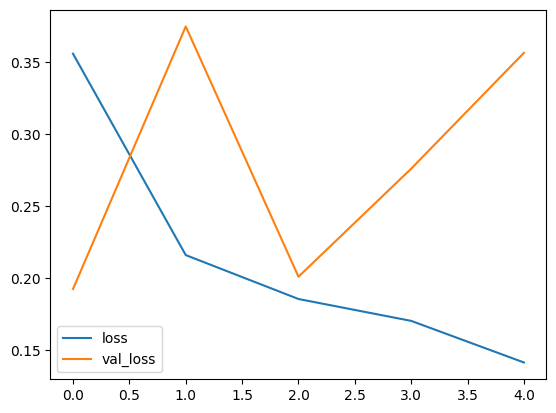

In [59]:
import seaborn as sns

sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

<Axes: >

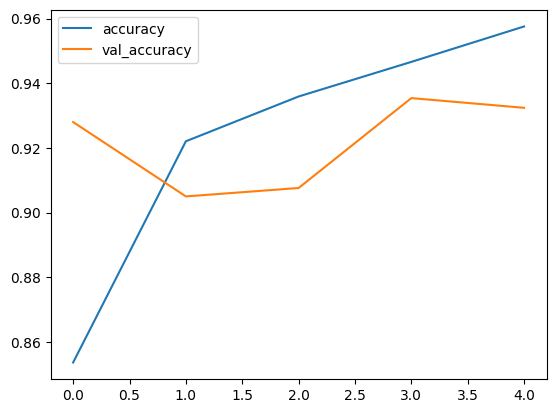

In [60]:
sns.lineplot(history.history["accuracy"], label="accuracy")
sns.lineplot(history.history["val_accuracy"], label="val_accuracy")

In [ ]:
# Okay demn this provides far better results than feature extraction
# Not overfitting also much